In [1]:
# imports.py
from imports import *

# plotting magic
%matplotlib inline


# !!! Warning !!! 
# *** no more warnings ***
# import warnings
# warnings.filterwarnings("ignore")

# custom mods
import tidy

In [2]:
df=tidy.csv_btcusd()

cached csv


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
df=tidy.pre_cleaning(df)

In [5]:
df=tidy.add_targets(df)

In [6]:
df.isnull().sum()

open                  0
high                  0
low                   0
close                 0
volume                0
fwd_log_ret           0
fwd_ret               0
fwd_pct_chg           0
fwd_close_positive    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2807 entries, 2014-09-17 00:00:00+00:00 to 2022-05-24 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                2807 non-null   float64
 1   high                2807 non-null   float64
 2   low                 2807 non-null   float64
 3   close               2807 non-null   float64
 4   volume              2807 non-null   int64  
 5   fwd_log_ret         2807 non-null   float64
 6   fwd_ret             2807 non-null   float64
 7   fwd_pct_chg         2807 non-null   float64
 8   fwd_close_positive  2807 non-null   bool   
dtypes: bool(1), float64(7), int64(1)
memory usage: 200.1 KB


In [8]:
df.head()

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive
date,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,-0.074643,-32.894013,-0.071926,False
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,-0.072402,-29.644012,-0.069843,False
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.035111,14.108002,0.035735,True
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,-0.024968,-10.082978,-0.024659,False
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True


In [9]:
print('Date Range:', df.index.min(), 'to', df.index.max())

Date Range: 2014-09-17 00:00:00+00:00 to 2022-05-24 00:00:00+00:00


In [10]:
print('Shape:', df.shape)

Shape: (2807, 9)


In [11]:
from sklearn.model_selection import TimeSeriesSplit

<AxesSubplot:xlabel='date'>

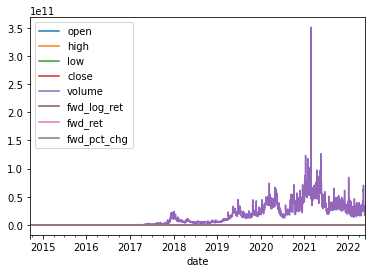

In [12]:
df.plot()

In [13]:
y = df.fwd_log_ret

<AxesSubplot:ylabel='Frequency'>

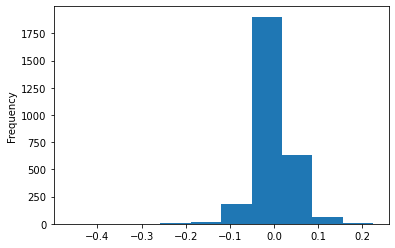

In [14]:
# y variable breakdown
y.plot.hist()

<AxesSubplot:xlabel='date'>

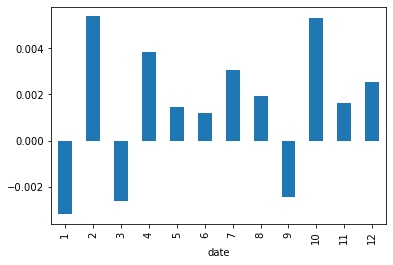

In [15]:
# y variable by different time lengths
y.groupby(y.index.month).mean().plot.bar()

In [16]:
# H0: Mean of {day_name} fwd_log_ret <= mean of all fwd_log_ret
# HA: Mean of {day_name} fwd_log_ret > mean of all fwd_log_ret
def t_test_month(df):
    '''
    T-test for significance based on day_name for fwd_log_ret
    '''
    alpha = .05
    overall_mean = df.fwd_log_ret.mean()
    for m in df.index.month.unique():
        day_sample = df[df.index.month == m].fwd_log_ret
        print(f'Month is {m}')
        t, p = stats.ttest_1samp(day_sample, overall_mean)
        if p/2 > alpha:
            print('We fail to reject null hypothesis.')
        elif t < 0:
            print('We fail to reject null hypothesis.')
        else:
            print('We reject null hypothesis.')
        print('------')

In [17]:
t_test_month(df)

Month is 9
We fail to reject null hypothesis.
------
Month is 10
We reject null hypothesis.
------
Month is 11
We fail to reject null hypothesis.
------
Month is 12
We fail to reject null hypothesis.
------
Month is 1
We fail to reject null hypothesis.
------
Month is 2
We fail to reject null hypothesis.
------
Month is 3
We fail to reject null hypothesis.
------
Month is 4
We fail to reject null hypothesis.
------
Month is 5
We fail to reject null hypothesis.
------
Month is 6
We fail to reject null hypothesis.
------
Month is 7
We fail to reject null hypothesis.
------
Month is 8
We fail to reject null hypothesis.
------


In [18]:
# H0: Mean of {day_name} fwd_log_ret >= mean of all fwd_log_ret
# HA: Mean of {day_name} fwd_log_ret < mean of all fwd_log_ret
def t_test_month_neg(df):
    '''
    T-test for significance based on day_name for fwd_log_ret
    '''
    alpha = .05
    overall_mean = df.fwd_log_ret.mean()
    for m in df.index.month.unique():
        day_sample = df[df.index.month == m].fwd_log_ret
        print(f'Month is {m}')
        t, p = stats.ttest_1samp(day_sample, overall_mean)
        if p/2 > alpha:
            print('We fail to reject null hypothesis.')
        elif t > 0:
            print('We fail to reject null hypothesis.')
        else:
            print('We reject null hypothesis.')
        print('------')

In [19]:
t_test_month_neg(df)

Month is 9
We reject null hypothesis.
------
Month is 10
We fail to reject null hypothesis.
------
Month is 11
We fail to reject null hypothesis.
------
Month is 12
We fail to reject null hypothesis.
------
Month is 1
We fail to reject null hypothesis.
------
Month is 2
We fail to reject null hypothesis.
------
Month is 3
We fail to reject null hypothesis.
------
Month is 4
We fail to reject null hypothesis.
------
Month is 5
We fail to reject null hypothesis.
------
Month is 6
We fail to reject null hypothesis.
------
Month is 7
We fail to reject null hypothesis.
------
Month is 8
We fail to reject null hypothesis.
------


<AxesSubplot:xlabel='date'>

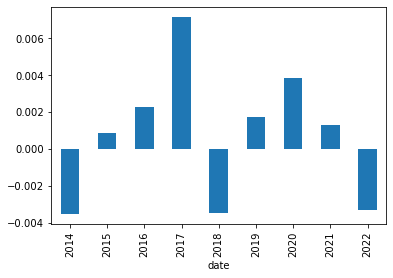

In [20]:
y.groupby(y.index.year).mean().plot.bar()

<AxesSubplot:xlabel='date'>

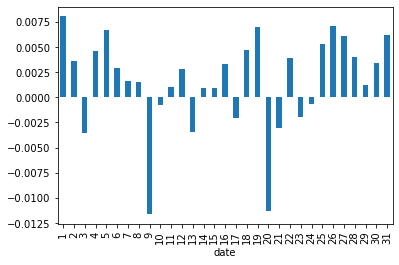

In [21]:
y.groupby(y.index.day).mean().plot.bar()

In [22]:
# H0: Mean of {day} fwd_log_ret <= mean of all fwd_log_ret
# HA: Mean of {day} fwd_log_ret > mean of all fwd_log_ret
def t_test_day(df):
    '''
    T-test for significance based on day_name for fwd_log_ret
    '''
    alpha = .05
    overall_mean = df.fwd_log_ret.mean()
    for d in df.index.day.unique():
        day_sample = df[df.index.day == d].fwd_log_ret
        print(f'Day is {d}')
        t, p = stats.ttest_1samp(day_sample, overall_mean)
        if p/2 > alpha:
            print('We fail to reject null hypothesis.')
        elif t < 0:
            print('We fail to reject null hypothesis.')
        else:
            print('We reject null hypothesis.')
        print('------')

In [23]:
t_test_day(df)

Day is 17
We fail to reject null hypothesis.
------
Day is 18
We fail to reject null hypothesis.
------
Day is 19
We fail to reject null hypothesis.
------
Day is 20
We fail to reject null hypothesis.
------
Day is 21
We fail to reject null hypothesis.
------
Day is 22
We fail to reject null hypothesis.
------
Day is 23
We fail to reject null hypothesis.
------
Day is 24
We fail to reject null hypothesis.
------
Day is 25
We fail to reject null hypothesis.
------
Day is 26
We fail to reject null hypothesis.
------
Day is 27
We fail to reject null hypothesis.
------
Day is 28
We fail to reject null hypothesis.
------
Day is 29
We fail to reject null hypothesis.
------
Day is 30
We fail to reject null hypothesis.
------
Day is 1
We reject null hypothesis.
------
Day is 2
We fail to reject null hypothesis.
------
Day is 3
We fail to reject null hypothesis.
------
Day is 4
We fail to reject null hypothesis.
------
Day is 5
We fail to reject null hypothesis.
------
Day is 6
We fail to rejec

In [24]:
# H0: Mean of {day} fwd_log_ret >= mean of all fwd_log_ret
# HA: Mean of {day} fwd_log_ret < mean of all fwd_log_ret
def t_test_day_neg(df):
    '''
    T-test for significance based on day_name for fwd_log_ret
    '''
    alpha = .05
    overall_mean = df.fwd_log_ret.mean()
    for d in df.index.day.unique():
        day_sample = df[df.index.day == d].fwd_log_ret
        print(f'Day is {d}')
        t, p = stats.ttest_1samp(day_sample, overall_mean)
        if p/2 > alpha:
            print('We fail to reject null hypothesis.')
        elif t > 0:
            print('We fail to reject null hypothesis.')
        else:
            print('We reject null hypothesis.')
        print('------')

In [25]:
t_test_day_neg(df)

Day is 17
We fail to reject null hypothesis.
------
Day is 18
We fail to reject null hypothesis.
------
Day is 19
We fail to reject null hypothesis.
------
Day is 20
We reject null hypothesis.
------
Day is 21
We fail to reject null hypothesis.
------
Day is 22
We fail to reject null hypothesis.
------
Day is 23
We fail to reject null hypothesis.
------
Day is 24
We fail to reject null hypothesis.
------
Day is 25
We fail to reject null hypothesis.
------
Day is 26
We fail to reject null hypothesis.
------
Day is 27
We fail to reject null hypothesis.
------
Day is 28
We fail to reject null hypothesis.
------
Day is 29
We fail to reject null hypothesis.
------
Day is 30
We fail to reject null hypothesis.
------
Day is 1
We fail to reject null hypothesis.
------
Day is 2
We fail to reject null hypothesis.
------
Day is 3
We fail to reject null hypothesis.
------
Day is 4
We fail to reject null hypothesis.
------
Day is 5
We fail to reject null hypothesis.
------
Day is 6
We fail to rejec

In [26]:
overall_mean = df.fwd_log_ret.mean()
overall_mean

0.0014866980730122267

<AxesSubplot:xlabel='date'>

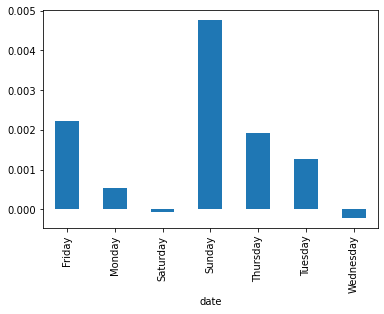

In [27]:
y.groupby(y.index.day_name()).mean().plot.bar()

In [28]:
import scipy.stats as stats

In [29]:
# H0: Mean of {day_name} fwd_log_ret <= mean of all fwd_log_ret
# HA: Mean of {day_name} fwd_log_ret > mean of all fwd_log_ret
def t_test_day_name(df):
    '''
    T-test for significance based on day_name for fwd_log_ret
    '''
    alpha = .05
    overall_mean = df.fwd_log_ret.mean()
    for d in df.index.day_name().unique():
        day_sample = df[df.index.day_name() == d].fwd_log_ret
        print(f'Day is {d}')
        t, p = stats.ttest_1samp(day_sample, overall_mean)
        if p/2 > alpha:
            print('We fail to reject null hypothesis.')
        elif t < 0:
            print('We fail to reject null hypothesis.')
        else:
            print('We reject null hypothesis.')
        print('------')

In [30]:
t_test_day_name(df)

Day is Wednesday
We fail to reject null hypothesis.
------
Day is Thursday
We fail to reject null hypothesis.
------
Day is Friday
We fail to reject null hypothesis.
------
Day is Saturday
We fail to reject null hypothesis.
------
Day is Sunday
We fail to reject null hypothesis.
------
Day is Monday
We fail to reject null hypothesis.
------
Day is Tuesday
We fail to reject null hypothesis.
------


In [31]:
# H0: Mean of {day_name} fwd_log_ret >= mean of all fwd_log_ret
# HA: Mean of {day_name} fwd_log_ret < mean of all fwd_log_ret
def t_test_day_name_neg(df):
    '''
    T-test for significance based on day_name for fwd_log_ret
    '''
    alpha = .05
    overall_mean = df.fwd_log_ret.mean()
    for d in df.index.day_name().unique():
        day_sample = df[df.index.day_name() == d].fwd_log_ret
        print(f'Day is {d}')
        t, p = stats.ttest_1samp(day_sample, overall_mean)
        if p/2 > alpha:
            print('We fail to reject null hypothesis.')
        elif t > 0:
            print('We fail to reject null hypothesis.')
        else:
            print('We reject null hypothesis.')
        print('------')

In [32]:
t_test_day_name_neg(df)

Day is Wednesday
We fail to reject null hypothesis.
------
Day is Thursday
We fail to reject null hypothesis.
------
Day is Friday
We fail to reject null hypothesis.
------
Day is Saturday
We fail to reject null hypothesis.
------
Day is Sunday
We fail to reject null hypothesis.
------
Day is Monday
We fail to reject null hypothesis.
------
Day is Tuesday
We fail to reject null hypothesis.
------


In [33]:
df['week_days'] = df.index.weekday
df['Dates'] = df.index

<AxesSubplot:>

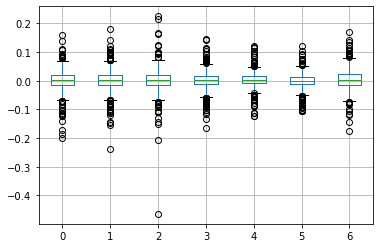

In [34]:
x = df.pivot(index='Dates', columns='week_days', values='fwd_log_ret')
x.boxplot()

<AxesSubplot:xlabel='date'>

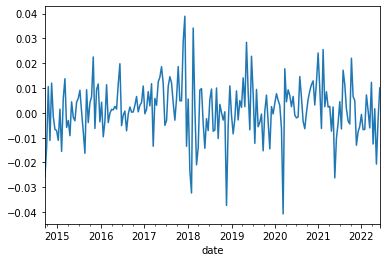

In [35]:
# visualize it over different periods
y.resample('2W').mean().plot()

<AxesSubplot:xlabel='date'>

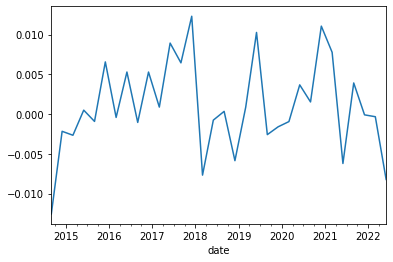

In [36]:
y.resample('3M').mean().plot()

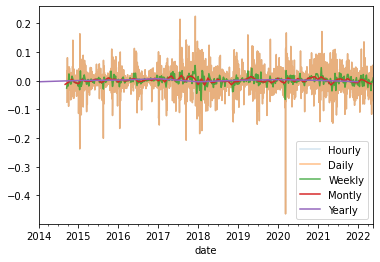

In [37]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

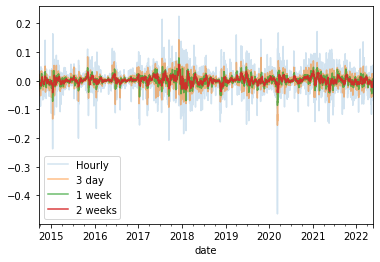

In [38]:
# Some moving averages with rolling
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.7, label='1 week')
y.resample('D').mean().rolling(14).mean().plot(alpha=.9, label='2 weeks')
plt.legend()

<AxesSubplot:title={'center':'Average week-to-week change'}, xlabel='date'>

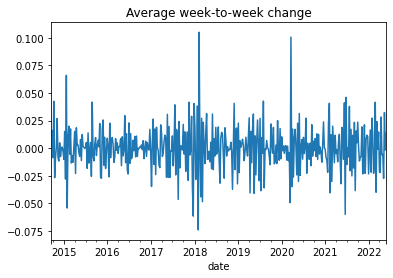

In [39]:
# Visualize the change from time period to next w/ diff
y.resample('W').mean().diff().plot(title='Average week-to-week change')

<AxesSubplot:title={'center':'Average month-to-month change'}, xlabel='date'>

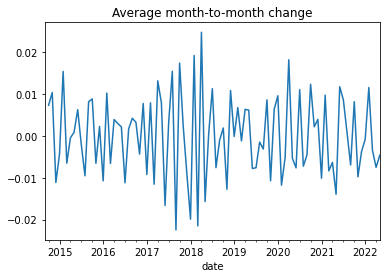

In [40]:
y.resample('M').mean().diff().plot(title='Average month-to-month change')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='date'>

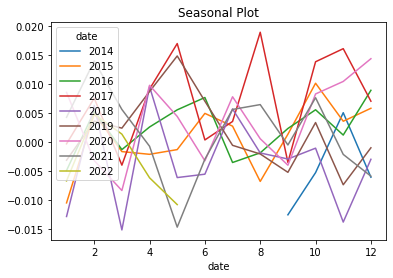

In [41]:
# Seasonal plot
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

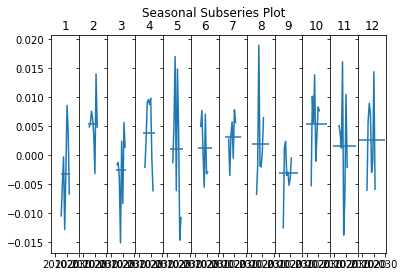

In [42]:
# Seasonal sub-series plot
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

Text(0.5, 1.0, 'Lag plot with lag=1')

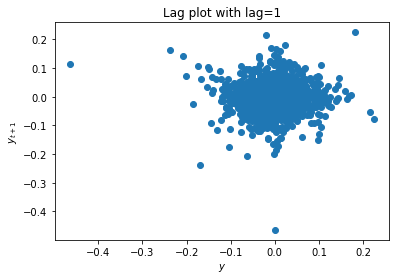

In [43]:
# Lag plot
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 4)'>

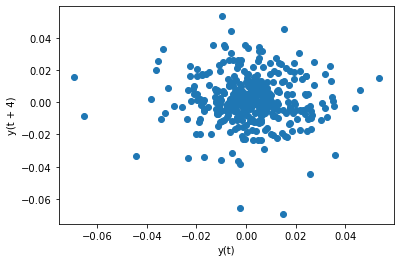

In [44]:
# Experiment with some lag times
pd.plotting.lag_plot(y.resample('W').mean(), lag=4)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 12)'>

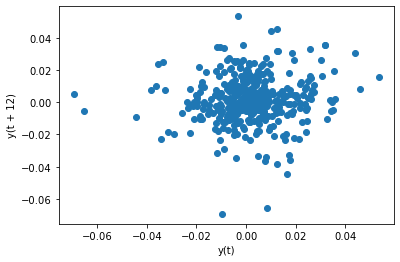

In [45]:
pd.plotting.lag_plot(y.resample('W').mean(), lag=12)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 6)'>

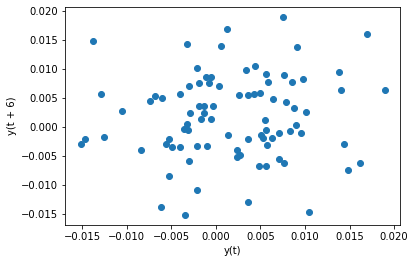

In [46]:
pd.plotting.lag_plot(y.resample('M').mean(), lag=6)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 12)'>

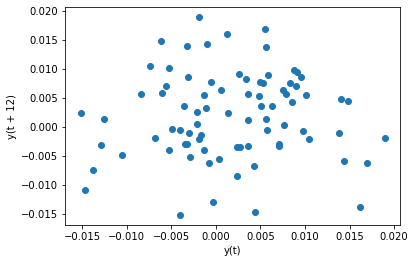

In [47]:
pd.plotting.lag_plot(y.resample('M').mean(), lag=12)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

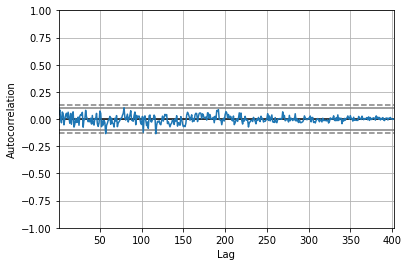

In [48]:
# Autocorrelation plot
pd.plotting.autocorrelation_plot(y.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

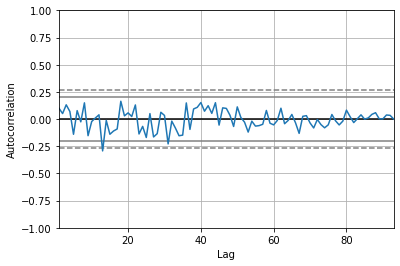

In [49]:
pd.plotting.autocorrelation_plot(y.resample('M').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

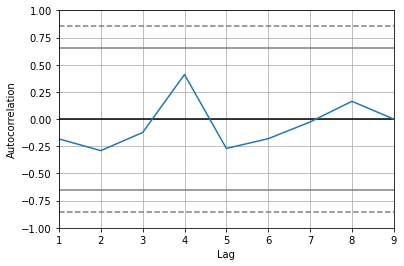

In [50]:
pd.plotting.autocorrelation_plot(y.resample('Y').mean())

<AxesSubplot:xlabel='date'>

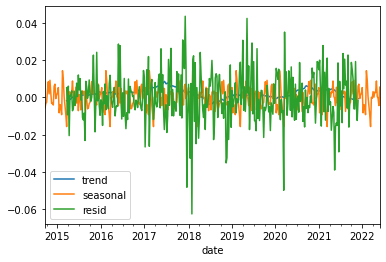

In [51]:
# Seasonal decomposition plots
y2 = y.resample('W').mean()
result = sm.tsa.seasonal_decompose(y2)
decomposition = pd.DataFrame({
    'y2': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.iloc[:, 1:].plot()

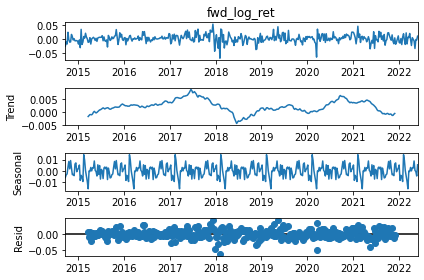

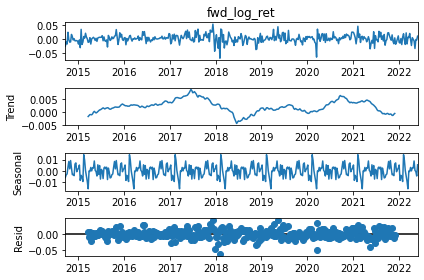

In [52]:
result.plot()

In [53]:
df.head()

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,week_days,Dates
date,,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,-0.074643,-32.894013,-0.071926,False,2,2014-09-17 00:00:00+00:00
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,-0.072402,-29.644012,-0.069843,False,3,2014-09-18 00:00:00+00:00
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.035111,14.108002,0.035735,True,4,2014-09-19 00:00:00+00:00
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,-0.024968,-10.082978,-0.024659,False,5,2014-09-20 00:00:00+00:00
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True,6,2014-09-21 00:00:00+00:00


In [54]:
# correlation for volume and fwd_log_ret
x = df.volume
y = df.fwd_log_ret

In [55]:
corr, p = stats.pearsonr(x, y)
corr, p

(-0.005117295473088181, 0.7863901818440325)

In [56]:
df['backward_log_volume'] = np.log(df.volume) - np.log(df.volume.shift(1))

In [57]:
# correlation for volume and fwd_log_ret
x = df.backward_log_volume
y = df.fwd_log_ret

In [58]:
# corr, p = stats.pearsonr(x, y)
# corr, p

In [59]:
df = df.dropna()

In [60]:
df.head()

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,week_days,Dates,backward_log_volume
date,,,,,,,,,,,,
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,-0.072402,-29.644012,-0.069843,False,3,2014-09-18 00:00:00+00:00,0.493249
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.035111,14.108002,0.035735,True,4,2014-09-19 00:00:00+00:00,0.094999
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,-0.024968,-10.082978,-0.024659,False,5,2014-09-20 00:00:00+00:00,-0.028246
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True,6,2014-09-21 00:00:00+00:00,-0.327062
2014-09-22 00:00:00+00:00,399.100006,406.915985,397.130005,402.152008,24127600,0.080333,33.638977,0.083647,True,0,2014-09-22 00:00:00+00:00,-0.096806


In [61]:
import waterman_python

In [62]:
to_encode = waterman_python.t_test_month(df)

In [63]:
to_encode

[10]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2806 entries, 2014-09-18 00:00:00+00:00 to 2022-05-24 00:00:00+00:00
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   open                 2806 non-null   float64            
 1   high                 2806 non-null   float64            
 2   low                  2806 non-null   float64            
 3   close                2806 non-null   float64            
 4   volume               2806 non-null   int64              
 5   fwd_log_ret          2806 non-null   float64            
 6   fwd_ret              2806 non-null   float64            
 7   fwd_pct_chg          2806 non-null   float64            
 8   fwd_close_positive   2806 non-null   bool               
 9   week_days            2806 non-null   int64              
 10  Dates                2806 non-null   datetime64[ns, UTC]
 11  backward_log_volume  2806 non-null